# 1. Import and Install Dependencies

In [ ]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [15]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [16]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [17]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [18]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [22]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [29]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [30]:
results

mediapipe.python.solution_base.SolutionOutputs

In [31]:
draw_landmarks(frame, results)

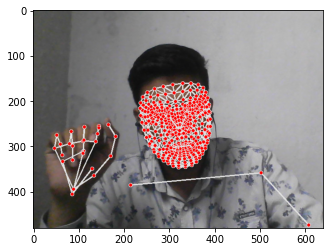

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [33]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [34]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [35]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [36]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (<ipython-input-36-3fe2adb7da0b>, line 2)

In [37]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [38]:
result_test = extract_keypoints(results)

In [39]:
result_test

array([ 0.50563425,  0.55374396, -0.99293965, ...,  0.10137603,
        0.66559941, -0.02886886])

In [40]:
468*3+33*4+21*3+21*3

1662

In [41]:
np.save('0', result_test)

In [125]:
np.load('0.npy')

array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [43]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['tea','teach','technology'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [44]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [45]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [46]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [47]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [48]:
label_map = {label:num for num, label in enumerate(actions)}

In [49]:
label_map

{'tea': 0, 'teach': 1, 'technology': 2}

In [50]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [51]:
np.array(sequences).shape

(90, 30, 1662)

In [52]:
np.array(labels).shape

(90,)

In [53]:
X = np.array(sequences)

In [54]:
X.shape

(90, 30, 1662)

In [55]:
y = to_categorical(labels).astype(int)

In [56]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [58]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [60]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [61]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [62]:
res = [.7, 0.2, 0.1]

In [63]:
actions[np.argmax(res)]

'tea'

In [64]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [65]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 224ms/step - loss: 1.1309 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.6477 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1869 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.5482 - categorical_accuracy: 0.3294
Epoch 5/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.2254 - categorical_accuracy: 0.3647
Epoch 6/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0809 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1006 - categorical_accuracy: 0.2824
Epoch 8/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1045 - categorical_accuracy: 0.3529
Epoch 9/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9576 - categorical_accuracy: 0.6118


3/3 [==============================] - 0s 56ms/step - loss: 0.4866 - categorical_accuracy: 0.7412
Epoch 75/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4689 - categorical_accuracy: 0.7412
Epoch 76/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4536 - categorical_accuracy: 0.8118
Epoch 77/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4530 - categorical_accuracy: 0.7882
Epoch 78/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.4281 - categorical_accuracy: 0.8000
Epoch 79/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.4177 - categorical_accuracy: 0.7882
Epoch 80/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4185 - categorical_accuracy: 0.8471
Epoch 81/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4010 - categorical_accuracy: 0.8235
Epoch 82/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.3826 - categorical_accuracy: 0.8706


3/3 [==============================] - 0s 130ms/step - loss: 0.4973 - categorical_accuracy: 0.8471
Epoch 147/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.5459 - categorical_accuracy: 0.7882
Epoch 148/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4140 - categorical_accuracy: 0.8706
Epoch 149/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4143 - categorical_accuracy: 0.8941
Epoch 150/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4537 - categorical_accuracy: 0.8000
Epoch 151/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3295 - categorical_accuracy: 0.8941
Epoch 152/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3101 - categorical_accuracy: 0.9059
Epoch 153/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3046 - categorical_accuracy: 0.9176
Epoch 154/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3202 - categorical_accuracy: 0.9

3/3 [==============================] - 0s 70ms/step - loss: 0.3307 - categorical_accuracy: 0.7882
Epoch 219/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.2749 - categorical_accuracy: 0.9529
Epoch 220/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2370 - categorical_accuracy: 0.9765
Epoch 221/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.2267 - categorical_accuracy: 0.9529
Epoch 222/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2153 - categorical_accuracy: 0.9529
Epoch 223/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1946 - categorical_accuracy: 0.9529
Epoch 224/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1782 - categorical_accuracy: 0.9529
Epoch 225/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1643 - categorical_accuracy: 0.9529
Epoch 226/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1510 - categorical_accuracy: 0.952

3/3 [==============================] - 0s 77ms/step - loss: 0.4092 - categorical_accuracy: 0.8588
Epoch 291/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4319 - categorical_accuracy: 0.8118
Epoch 292/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4313 - categorical_accuracy: 0.7765
Epoch 293/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.3771 - categorical_accuracy: 0.8706
Epoch 294/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2713 - categorical_accuracy: 0.9059
Epoch 295/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4074 - categorical_accuracy: 0.8471
Epoch 296/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3206 - categorical_accuracy: 0.8941
Epoch 297/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.2011 - categorical_accuracy: 0.9647
Epoch 298/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.2323 - categorical_accuracy: 0.929

3/3 [==============================] - 0s 67ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0042 - categorical_accuracy: 1.0000
Epoch 364/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 365/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0037 - categorical_accuracy: 1.0000
Epoch 366/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 367/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 368/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 369/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 370/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0018 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 69ms/step - loss: 2.7289e-04 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.6765e-04 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.6294e-04 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.5841e-04 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.5370e-04 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.4996e-04 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.4547e-04 - categorical_accuracy: 1.0000
Epoch 439/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.4246e-04 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.37

3/3 [==============================] - 0s 67ms/step - loss: 1.0600e-04 - categorical_accuracy: 1.0000
Epoch 503/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0487e-04 - categorical_accuracy: 1.0000
Epoch 504/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0397e-04 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0295e-04 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0181e-04 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0059e-04 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 68ms/step - loss: 9.9600e-05 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 76ms/step - loss: 9.8671e-05 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 82ms/step - loss: 9.78

3/3 [==============================] - 0s 68ms/step - loss: 5.6596e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.6165e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.5687e-05 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.5243e-05 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.4819e-05 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.4417e-05 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.4082e-05 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.3587e-05 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.32

3/3 [==============================] - 0s 68ms/step - loss: 3.4796e-05 - categorical_accuracy: 1.0000
Epoch 643/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.4590e-05 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.4363e-05 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.4136e-05 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.3933e-05 - categorical_accuracy: 1.0000
Epoch 647/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.3729e-05 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.3543e-05 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.3295e-05 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.31

3/3 [==============================] - 0s 70ms/step - loss: 2.3323e-05 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.3212e-05 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.3106e-05 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.2991e-05 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.2857e-05 - categorical_accuracy: 1.0000
Epoch 717/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.2755e-05 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.2634e-05 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.2487e-05 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.23

3/3 [==============================] - 0s 69ms/step - loss: 1.6515e-05 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.6436e-05 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.6355e-05 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.6266e-05 - categorical_accuracy: 1.0000
Epoch 786/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.6213e-05 - categorical_accuracy: 1.0000
Epoch 787/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.6114e-05 - categorical_accuracy: 1.0000
Epoch 788/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.6056e-05 - categorical_accuracy: 1.0000
Epoch 789/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.5978e-05 - categorical_accuracy: 1.0000
Epoch 790/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.59

3/3 [==============================] - 0s 69ms/step - loss: 1.2121e-05 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2072e-05 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.2015e-05 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1963e-05 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1916e-05 - categorical_accuracy: 1.0000
Epoch 857/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1873e-05 - categorical_accuracy: 1.0000
Epoch 858/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1818e-05 - categorical_accuracy: 1.0000
Epoch 859/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1773e-05 - categorical_accuracy: 1.0000
Epoch 860/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.17

3/3 [==============================] - 0s 68ms/step - loss: 9.0905e-06 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 67ms/step - loss: 9.0541e-06 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 68ms/step - loss: 9.0148e-06 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 69ms/step - loss: 8.9797e-06 - categorical_accuracy: 1.0000
Epoch 926/2000
3/3 [==============================] - 0s 67ms/step - loss: 8.9419e-06 - categorical_accuracy: 1.0000
Epoch 927/2000
3/3 [==============================] - 0s 68ms/step - loss: 8.9138e-06 - categorical_accuracy: 1.0000
Epoch 928/2000
3/3 [==============================] - 0s 69ms/step - loss: 8.8662e-06 - categorical_accuracy: 1.0000
Epoch 929/2000
3/3 [==============================] - 0s 67ms/step - loss: 8.8311e-06 - categorical_accuracy: 1.0000
Epoch 930/2000
3/3 [==============================] - 0s 68ms/step - loss: 8.79

3/3 [==============================] - 0s 69ms/step - loss: 6.9308e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 67ms/step - loss: 6.9084e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 69ms/step - loss: 6.8733e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.8565e-06 - categorical_accuracy: 1.0000
Epoch 996/2000
3/3 [==============================] - 0s 67ms/step - loss: 6.8341e-06 - categorical_accuracy: 1.0000
Epoch 997/2000
3/3 [==============================] - 0s 67ms/step - loss: 6.8060e-06 - categorical_accuracy: 1.0000
Epoch 998/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.7808e-06 - categorical_accuracy: 1.0000
Epoch 999/2000
3/3 [==============================] - 0s 67ms/step - loss: 6.7555e-06 - categorical_accuracy: 1.0000
Epoch 1000/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.7

3/3 [==============================] - 0s 66ms/step - loss: 5.3713e-06 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 64ms/step - loss: 5.3517e-06 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.3377e-06 - categorical_accuracy: 1.0000
Epoch 1064/2000
3/3 [==============================] - 0s 71ms/step - loss: 5.3082e-06 - categorical_accuracy: 1.0000
Epoch 1065/2000
3/3 [==============================] - 0s 71ms/step - loss: 5.2928e-06 - categorical_accuracy: 1.0000
Epoch 1066/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.2732e-06 - categorical_accuracy: 1.0000
Epoch 1067/2000
3/3 [==============================] - 0s 67ms/step - loss: 5.2521e-06 - categorical_accuracy: 1.0000
Epoch 1068/2000
3/3 [==============================] - 0s 73ms/step - loss: 5.2311e-06 - categorical_accuracy: 1.0000
Epoch 1069/2000
3/3 [==============================] - 0s 85ms/step - lo

3/3 [==============================] - 0s 68ms/step - loss: 4.2017e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 69ms/step - loss: 4.1863e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 67ms/step - loss: 4.1765e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.1597e-06 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [==============================] - 0s 66ms/step - loss: 4.1456e-06 - categorical_accuracy: 1.0000
Epoch 1135/2000
3/3 [==============================] - 0s 70ms/step - loss: 4.1330e-06 - categorical_accuracy: 1.0000
Epoch 1136/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.1204e-06 - categorical_accuracy: 1.0000
Epoch 1137/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.1050e-06 - categorical_accuracy: 1.0000
Epoch 1138/2000
3/3 [==============================] - 0s 67ms/step - lo

3/3 [==============================] - 0s 81ms/step - loss: 3.3196e-06 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.3098e-06 - categorical_accuracy: 1.0000
Epoch 1201/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.2901e-06 - categorical_accuracy: 1.0000
Epoch 1202/2000
3/3 [==============================] - 0s 67ms/step - loss: 3.2789e-06 - categorical_accuracy: 1.0000
Epoch 1203/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.2705e-06 - categorical_accuracy: 1.0000
Epoch 1204/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.2593e-06 - categorical_accuracy: 1.0000
Epoch 1205/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.2495e-06 - categorical_accuracy: 1.0000
Epoch 1206/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.2397e-06 - categorical_accuracy: 1.0000
Epoch 1207/2000
3/3 [==============================] - 0s 69ms/step - lo

3/3 [==============================] - 0s 83ms/step - loss: 2.6184e-06 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.6072e-06 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.6001e-06 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.5903e-06 - categorical_accuracy: 1.0000
Epoch 1272/2000
3/3 [==============================] - 0s 66ms/step - loss: 2.5819e-06 - categorical_accuracy: 1.0000
Epoch 1273/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.5721e-06 - categorical_accuracy: 1.0000
Epoch 1274/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.5581e-06 - categorical_accuracy: 1.0000
Epoch 1275/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.5497e-06 - categorical_accuracy: 1.0000
Epoch 1276/2000
3/3 [==============================] - 0s 65ms/step - lo

3/3 [==============================] - 0s 70ms/step - loss: 2.0476e-06 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.0392e-06 - categorical_accuracy: 1.0000
Epoch 1339/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.0322e-06 - categorical_accuracy: 1.0000
Epoch 1340/2000
3/3 [==============================] - 0s 68ms/step - loss: 2.0279e-06 - categorical_accuracy: 1.0000
Epoch 1341/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.0223e-06 - categorical_accuracy: 1.0000
Epoch 1342/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.0139e-06 - categorical_accuracy: 1.0000
Epoch 1343/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.0097e-06 - categorical_accuracy: 1.0000
Epoch 1344/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.9957e-06 - categorical_accuracy: 1.0000
Epoch 1345/2000
3/3 [==============================] - 0s 70ms/step - lo

KeyboardInterrupt: 

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [67]:
res = model.predict(X_test)

In [68]:
actions[np.argmax(res[4])]

'teach'

In [69]:
actions[np.argmax(y_test[4])]

'teach'

# 9. Save Weights

In [101]:
model.save('action.h5')

In [102]:
del model

In [103]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

# 10. Evaluation using Confusion Matrix and Accuracy

In [70]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [71]:
yhat = model.predict(X_test)

In [72]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [73]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [74]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [75]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [76]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [77]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [78]:
len(sequence)

TypeError: object of type 'int' has no len()

In [79]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [80]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [81]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [100]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionOutputs'>
technology
<class 'mediapipe.python.solution_base.SolutionO

In [94]:
cap.release()
cv2.destroyAllWindows()

In [85]:
res[np.argmax(res)] > threshold

True

In [86]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [87]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[3.8946326e-09, 4.2938879e-09, 1.0000000e+00]], dtype=float32)

In [96]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8


cap = cv2.VideoCapture("technology.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 1: 
                sentence = sentence[-1:]
                

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti